<a href="https://colab.research.google.com/github/Sabipikin/Jobs/blob/main/Interactive_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive on colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import datasets

import os
import pandas as pd

def import_multiple_csv_files(directory):
    # Get a list of all CSV files in the directory
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]

    # Initialize an empty dictionary to store the dataframes
    dfs = {}

    # Loop through each CSV file and import it as a dataframe
    for i, file in enumerate(files, start=1):
        file_path = os.path.join(directory, file)
        df_name = f"df{i}"  # Create dataframe name as df1, df2, ...
        df = pd.read_csv(file_path)
        dfs[df_name] = df

    return dfs

# Replace 'directory_path' with the path to your directory containing CSV files
directory_path = '/content/drive/MyDrive/dataset'
dataframes = import_multiple_csv_files(directory_path)

# Now you have a dictionary containing dataframes named df1, df2, ...
# You can access each dataframe like this:
for df_name, df in dataframes.items():
    print(f"Data from dataframe '{df_name}':")
    print(df)
    print("\n")

    # Delete first five rows from each dataframe
    dataframes[df_name] = df.iloc[5:]

    # Reset index to start from 1
    dataframes[df_name].reset_index(drop=True, inplace=True)

    # Adjust 's/n' column to start counting from 1
    dataframes[df_name].loc[:, 's/n'] = range(1, len(dataframes[df_name]) + 1)

# Printing after deletion of first five rows
for df_name, df in dataframes.items():
    print(f"Data from dataframe '{df_name}' after deleting the first five rows:")
    print(df)
    print("\n")

Data from dataframe 'df1':
    s/n country  year  number of tourist  crime rate per 100k population  \
0     1   spain  1990                NaN                          1.2444   
1     2   spain  1991                NaN                          1.1270   
2     3   spain  1992                NaN                          1.1243   
3     4   spain  1993                NaN                          1.2019   
4     5   spain  1994                NaN                          1.0827   
5     6   spain  1995         52460000.0                          1.0323   
6     7   spain  1996         55077000.0                          0.9926   
7     8   spain  1997         62415000.0                          1.1523   
8     9   spain  1998         68068000.0                          1.2933   
9    10   spain  1999         72040000.0                          1.1987   
10   11   spain  2000         74580000.0                          1.3573   
11   12   spain  2001         75564000.0                     

# **Data Cleaning**

In [ ]:
import pandas as pd

def handle_missing_data(df):
    # Check for missing data
    missing_data = df.isnull().sum()

    # Handle missing data (e.g., fill missing values with mean, median, or mode)
    # For demonstration purposes, let's fill missing values with mean after converting to numeric
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, coerce errors to NaN
            df[column].fillna(df[column].mean(), inplace=True)  # Fill missing values with mean

def handle_duplicate_data(df):
    # Check for duplicate data
    duplicate_rows = df.duplicated()

    # Handle duplicate data (e.g., drop duplicates)
    df.drop_duplicates(inplace=True)

def handle_outliers(df):
    # Identify and handle outliers (e.g., replace outliers with a certain value)
    # For demonstration purposes, let's replace outliers with the median after converting to numeric
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, coerce errors to NaN
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else df[column].median())
    return df

# Function to handle all tasks for all datasets
def handle_data(datasets):
    for name, df in datasets.items():
        handle_missing_data(df)
        handle_duplicate_data(df)
        df_cleaned = handle_outliers(df)
        datasets[name] = df_cleaned
        print(f"Dataset '{name}' after cleaning:")
        print(df_cleaned)
        print("\n")
    return datasets

# define datasets
df1 = dataframes['df1']
df2 = dataframes['df2']
df3 = dataframes['df3']
df4 = dataframes['df4']

# Apply the data cleaning to each dataframe
datasets = {'df1': df1, 'df2': df2, 'df3': df3, 'df4':df4}

# Usage:
datasets = handle_data(datasets)

Dataset 'df1' after cleaning:
    s/n country  year  number of tourist  crime rate per 100k population  \
0     1   spain  1995       5.246000e+07                          1.0323   
1     2   spain  1996       5.507700e+07                          0.9926   
2     3   spain  1997       6.241500e+07                          1.1523   
3     4   spain  1998       6.806800e+07                          1.2933   
4     5   spain  1999       7.204000e+07                          1.1987   
5     6   spain  2000       7.458000e+07                          1.3573   
6     7   spain  2001       7.556400e+07                          1.4085   
7     8   spain  2002       7.931300e+07                          1.3598   
8     9   spain  2003       8.232600e+07                          1.3900   
9    10   spain  2004       8.598100e+07                          1.2104   
10   11   spain  2005       9.256300e+07                          1.1858   
11   12   spain  2006       9.615200e+07                  

## **Add new Column**
'Crime Change'

In [ ]:
def add_crime_change_column(df):
    # Add a new column 'Crime Change' based on 'Annual % Change'
    df['Crime Change'] = df['Annual % Change'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

# Function to handle all tasks for all datasets
def handle_data(datasets):
    for name, df in datasets.items():
        handle_missing_data(df)
        handle_duplicate_data(df)
        df_cleaned = handle_outliers(df)
        datasets[name] = df_cleaned
        add_crime_change_column(df)  # Add Crime Change column after cleaning
        print(f"Dataset '{name}' after cleaning and adding Crime Change column:")
        print(df)
        print("\n")
    return datasets

# Usage:
datasets = handle_data(datasets)

Dataset 'df1' after cleaning and adding Crime Change column:
    s/n country  year  number of tourist  crime rate per 100k population  \
0     1   spain  1995       5.246000e+07                          1.0323   
1     2   spain  1996       5.507700e+07                          0.9926   
2     3   spain  1997       6.241500e+07                          1.1523   
3     4   spain  1998       6.806800e+07                          1.2933   
4     5   spain  1999       7.204000e+07                          1.1987   
5     6   spain  2000       7.458000e+07                          1.3573   
6     7   spain  2001       7.556400e+07                          1.4085   
7     8   spain  2002       7.931300e+07                          1.3598   
8     9   spain  2003       8.232600e+07                          1.3900   
9    10   spain  2004       8.598100e+07                          1.2104   
10   11   spain  2005       9.256300e+07                          1.1858   
11   12   spain  2006      

# New section

# **Exploratory Data Analysis**

Exploratory Data Analysis for DataFrame 'df1':
Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   s/n                             27 non-null     int64  
 1   country                         27 non-null     object 
 2   year                            27 non-null     int64  
 3   number of tourist               27 non-null     float64
 4   crime rate per 100k population  27 non-null     float64
 5   Annual % Change                 27 non-null     float64
 6   Crime Change                    27 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ KB
None


Summary statistics of numerical columns:
             s/n         year  number of tourist  \
count  27.000000    27.000000       2.700000e+01   
mean   14.000000  2008.000000       8.925373e+07 

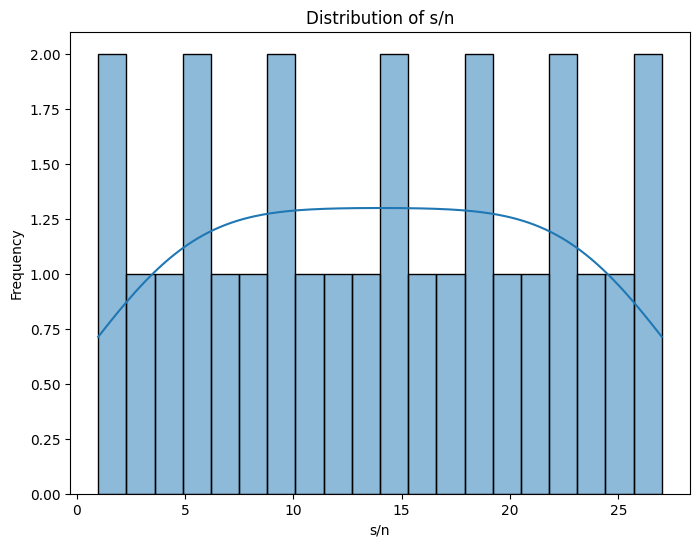

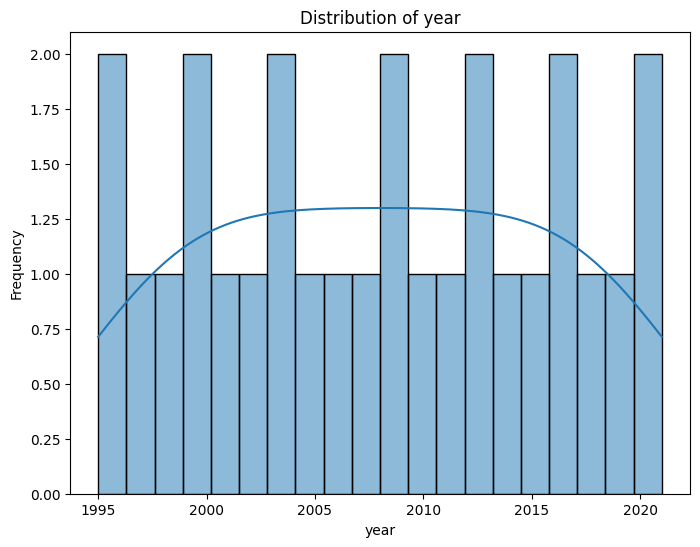

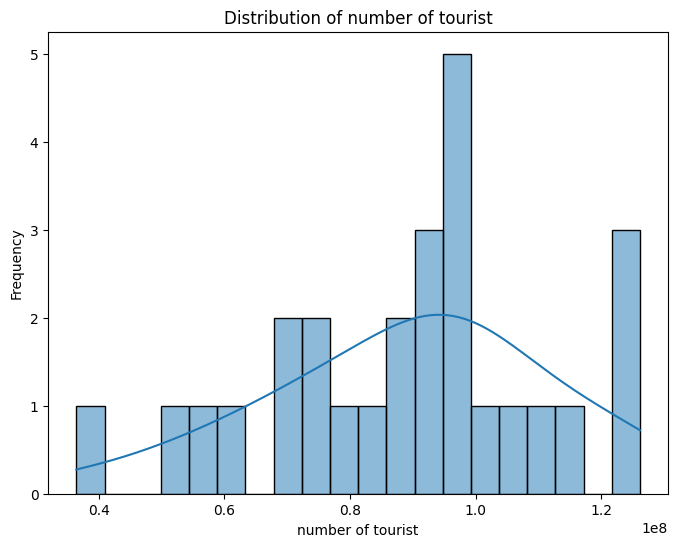

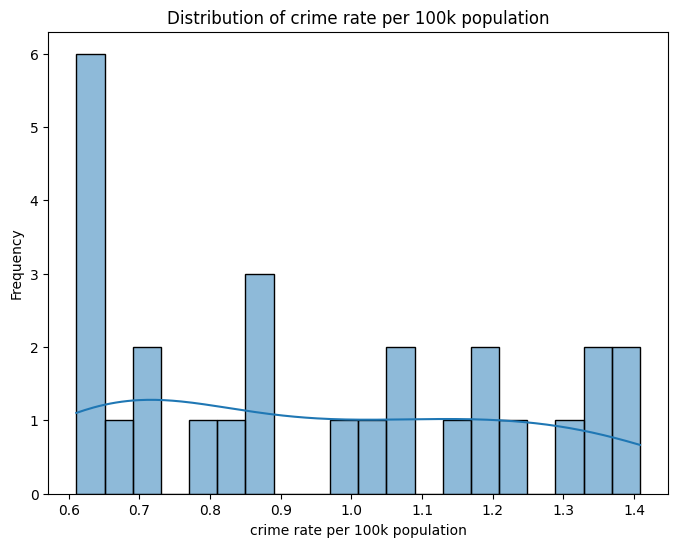

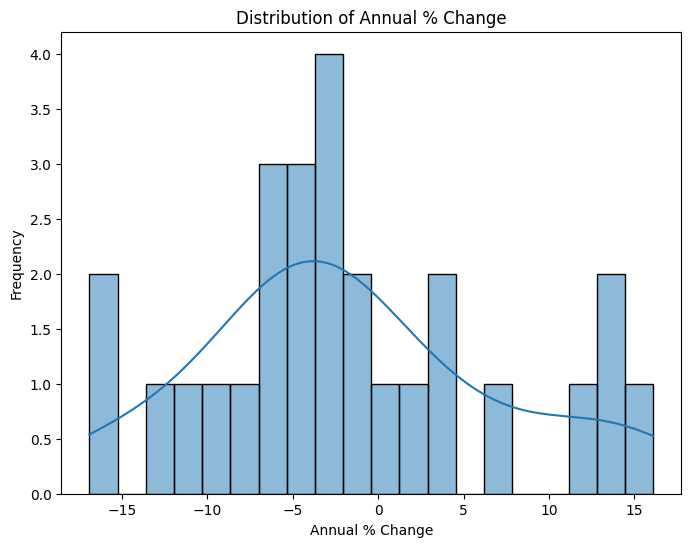

Exploratory Data Analysis for DataFrame 'df2':
Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   s/n                             27 non-null     int64  
 1   country                         27 non-null     object 
 2   year                            27 non-null     int64  
 3   number of tourist               27 non-null     float64
 4   crime rate per 100k population  27 non-null     float64
 5   Annual % Change                 27 non-null     float64
 6   Crime Change                    27 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ KB
None


Summary statistics of numerical columns:
             s/n         year  number of tourist  \
count  27.000000    27.000000       2.700000e+01   
mean   14.000000  2008.000000       1.936849e+08 

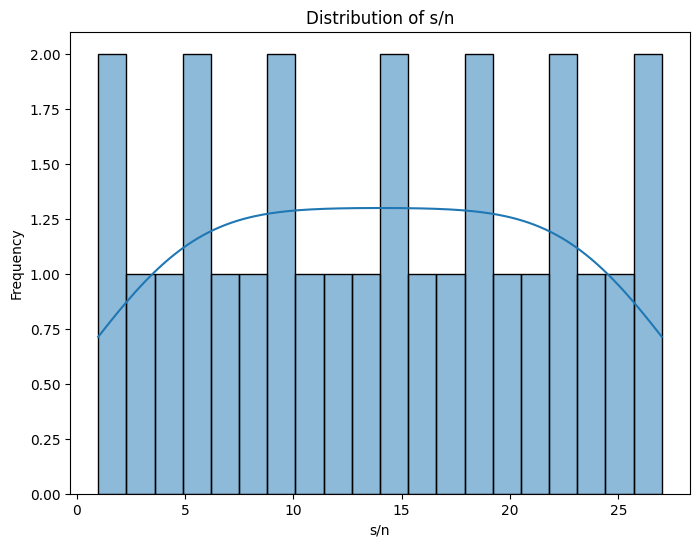

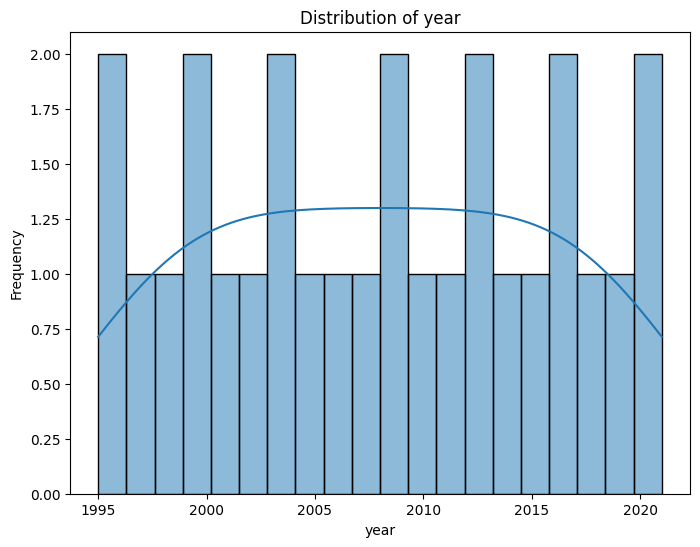

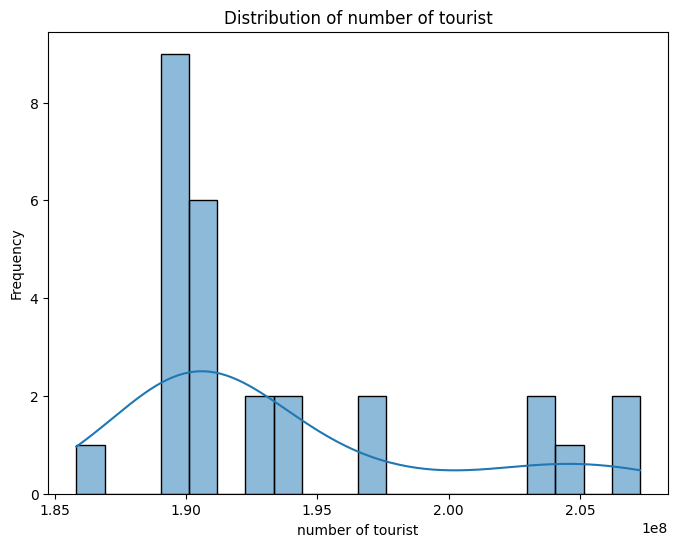

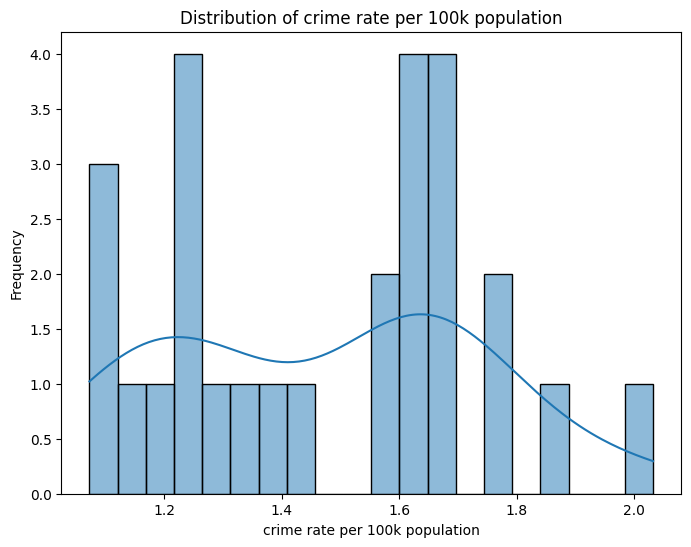

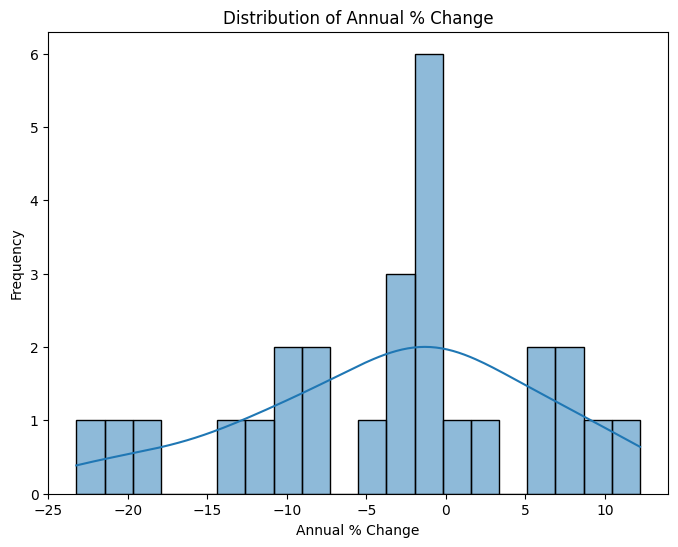

Exploratory Data Analysis for DataFrame 'df3':
Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   s/n                             27 non-null     int64  
 1   country                         27 non-null     object 
 2   year                            27 non-null     int64  
 3   number of tourist               27 non-null     float64
 4   crime rate per 100k population  27 non-null     float64
 5   Annual % Change                 27 non-null     float64
 6   Crime Change                    27 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ KB
None


Summary statistics of numerical columns:
             s/n         year  number of tourist  \
count  27.000000    27.000000       2.700000e+01   
mean   14.000000  2008.000000       1.010520e+07 

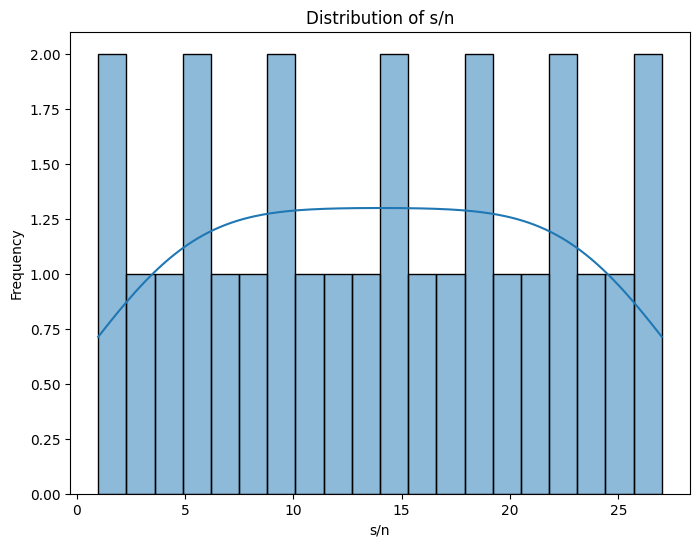

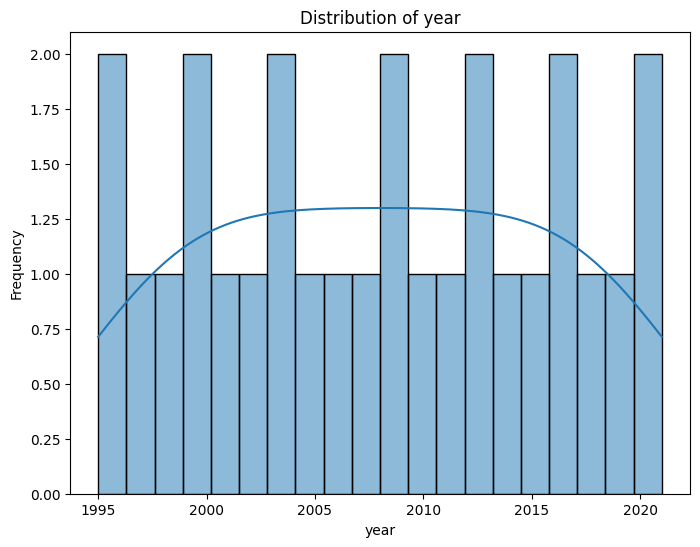

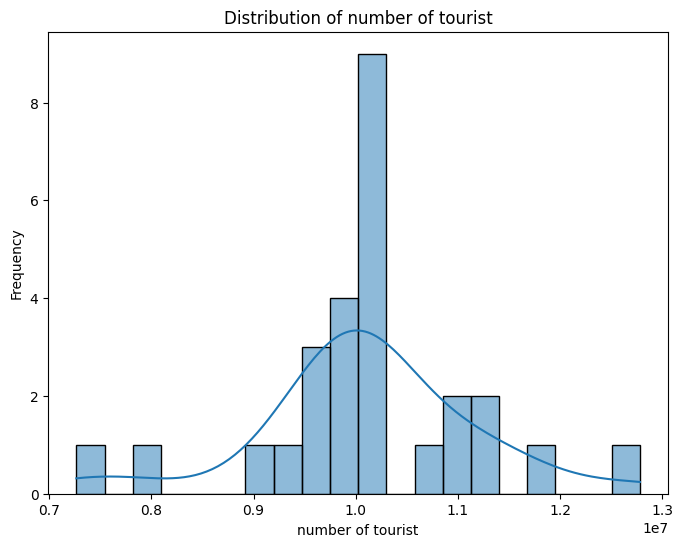

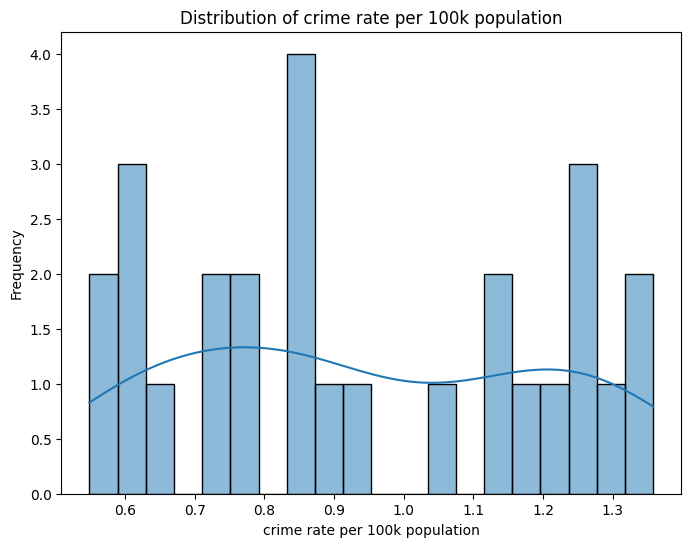

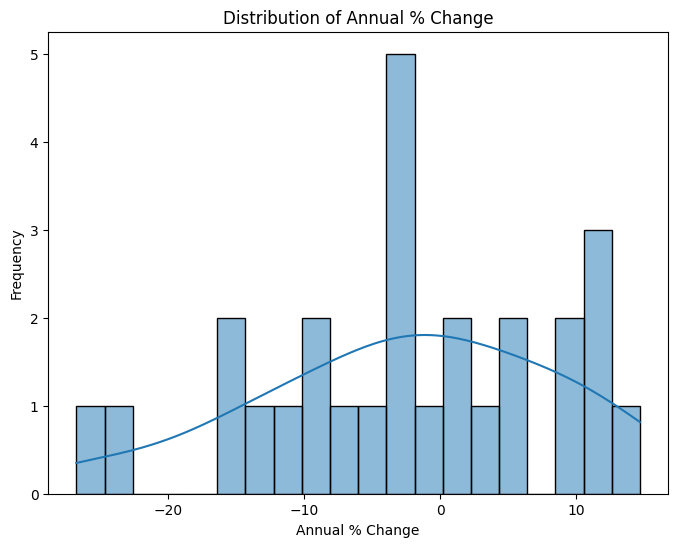

Exploratory Data Analysis for DataFrame 'df4':
Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   s/n                             27 non-null     int64  
 1   country                         27 non-null     object 
 2   year                            27 non-null     int64  
 3   number of tourist               27 non-null     float64
 4   crime rate per 100k population  27 non-null     float64
 5   Annual % Change                 27 non-null     float64
 6   Crime Change                    27 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ KB
None


Summary statistics of numerical columns:
             s/n         year  number of tourist  \
count  27.000000    27.000000       2.700000e+01   
mean   14.000000  2008.000000       5.387412e+06 

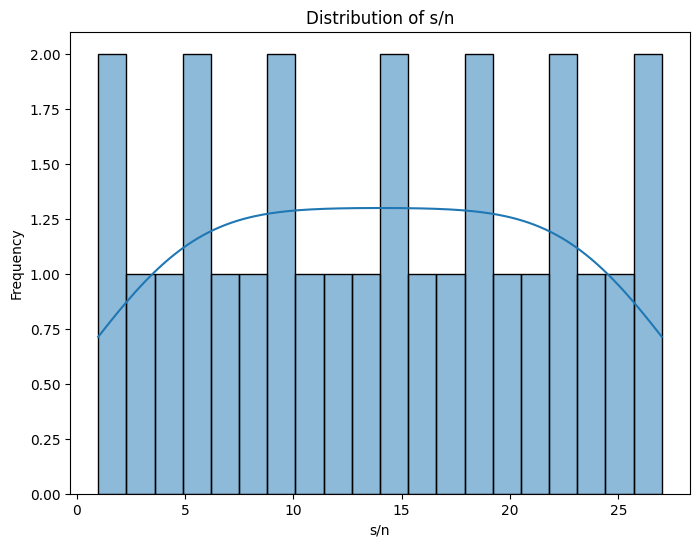

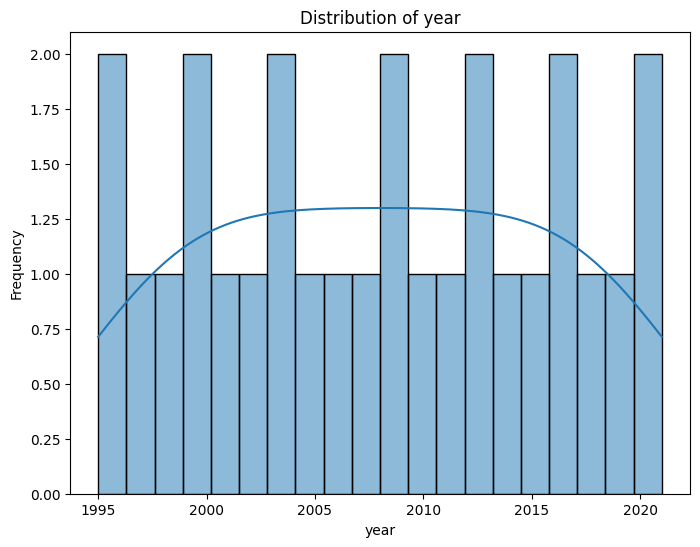

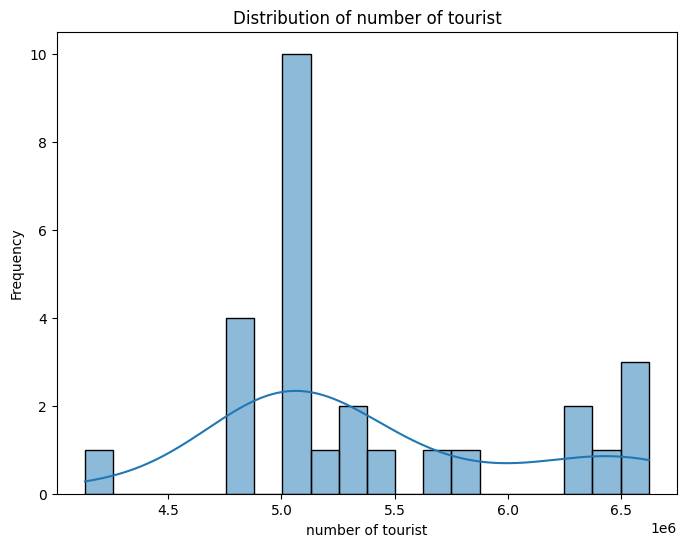

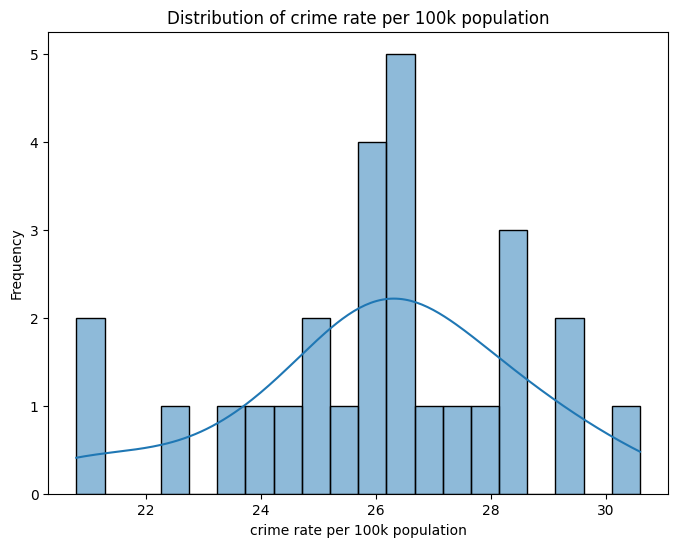

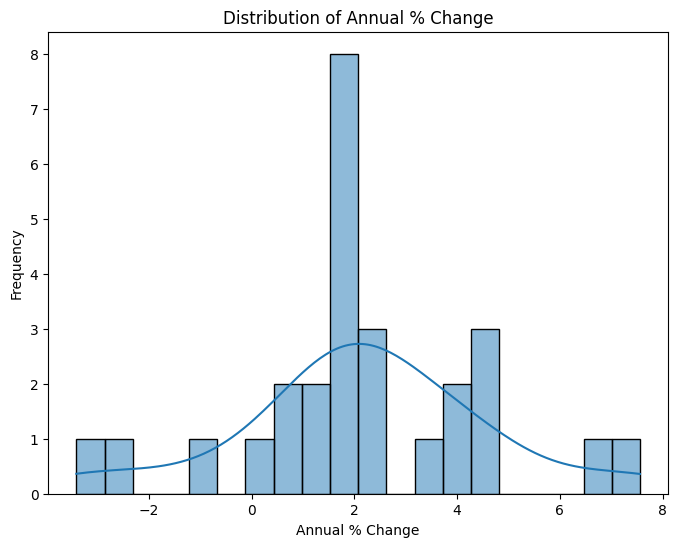

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for Exploratory Data Analysis
def explore_data(df):
    # Display basic information about the DataFrame
    print("Basic information about the DataFrame:")
    print(df.info())
    print("\n")

    # Display summary statistics of numerical columns
    print("Summary statistics of numerical columns:")
    print(df.describe())
    print("\n")

    # Display the first few rows of the DataFrame
    print("First few rows of the DataFrame:")
    print(df.head())
    print("\n")

    # Visualize distributions of numerical columns
    print("Distributions of numerical columns:")
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

# Apply EDA to each DataFrame
for name, df in datasets.items():
    print(f"Exploratory Data Analysis for DataFrame '{name}':")
    explore_data(df)

# **Quantitative Analysis**

## **Comparison Of Countries**

In [ ]:
import plotly.graph_objects as go
import pandas as pd

def compare_columns(datasets, columns_to_compare):
    for column in columns_to_compare:
        # Create figure
        fig = go.Figure()

        # Define color scale for countries
        colorscale = {'Spain': 'blue', 'France': 'red', 'Netherlands': 'green', 'Brazil': 'yellow'}

        # Add traces for each dataset
        for name, df in datasets.items():
            country_name = ""
            if name == 'df1':
                country_name = 'Spain'
            elif name == 'df2':
                country_name = 'France'
            elif name == 'df3':
                country_name = 'Netherlands'
            elif name == 'df4':
                country_name = 'Brazil'

            # Add trace for each country
            fig.add_trace(go.Scatter(x=df['year'],
                                     y=df[column],
                                     mode='lines',
                                     name=country_name,
                                     line=dict(color=colorscale[country_name]),
                                     legendgroup=country_name))

        # Update layout
        fig.update_layout(
            title=f"Comparison of {column} across datasets",
            xaxis_title="Year",
            yaxis_title=column,
            template="plotly_white"
        )

        # Show figure
        fig.show()

        # Table comparison
        print(f"Table for {column}:")
        table_data = {country_name: df[column] for name, df in datasets.items() for country_name in ['Spain', 'France', 'Netherlands', 'Brazil']}
        table_df = pd.DataFrame(table_data)
        display(table_df)

# Columns to compare
columns_to_compare = ['number of tourist', 'crime rate per 100k population', 'Annual % Change']

# Apply comparison to specified columns
compare_columns(dataframes, columns_to_compare)

Table for number of tourist:


,Spain,France,Netherlands,Brazil
0,1.010400e+07,1.010400e+07,1.010400e+07,1.010400e+07
1,1.010400e+07,1.010400e+07,1.010400e+07,1.010400e+07
2,7.841000e+06,7.841000e+06,7.841000e+06,7.841000e+06
3,9.312000e+06,9.312000e+06,9.312000e+06,9.312000e+06
4,9.874000e+06,9.874000e+06,9.874000e+06,9.874000e+06
5,1.000300e+07,1.000300e+07,1.000300e+07,1.000300e+07
6,9.500000e+06,9.500000e+06,9.500000e+06,9.500000e+06
7,9.595000e+06,9.595000e+06,9.595000e+06,9.595000e+06
8,9.181000e+06,9.181000e+06,9.181000e+06,9.181000e+06
9,9.646000e+06,9.646000e+06,9.646000e+06,9.646000e+06


Table for crime rate per 100k population:


,Spain,France,Netherlands,Brazil
0,1.2495,1.2495,1.2495,1.2495
1,1.3579,1.3579,1.3579,1.3579
2,1.3308,1.3308,1.3308,1.3308
3,1.1194,1.1194,1.1194,1.1194
4,1.2838,1.2838,1.2838,1.2838
5,1.1321,1.1321,1.1321,1.1321
6,1.2640,1.2640,1.2640,1.2640
7,1.2144,1.2144,1.2144,1.2144
8,1.2525,1.2525,1.2525,1.2525
9,1.1793,1.1793,1.1793,1.1793


Table for Annual % Change:


,Spain,France,Netherlands,Brazil
0,12.16,12.16,12.16,12.16
1,8.68,8.68,8.68,8.68
2,-2.00,-2.00,-2.00,-2.00
3,-15.89,-15.89,-15.89,-15.89
4,14.69,14.69,14.69,14.69
5,-11.82,-11.82,-11.82,-11.82
6,11.65,11.65,11.65,11.65
7,-3.92,-3.92,-3.92,-3.92
8,3.14,3.14,3.14,3.14
9,-5.84,-5.84,-5.84,-5.84


## **Comparative Analysis of Crime Rates**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def crime_rate_analysis(df):
    # Descriptive statistics
    print("Descriptive statistics of crime rates:")
    crime_stats = df['crime rate per 100k population'].describe()
    print(crime_stats)
    print("\n")

    # Regression analysis
    print("Regression analysis:")
    # Assuming 'crime_rate' is the dependent variable and other relevant columns are predictors
    X = df[['year', 'number of tourist', 'Annual % Change']].astype(float)
    y = df['crime rate per 100k population'].astype(float)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print("\n")

    # Feature importance
    feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
    print("Feature Importance:")
    print(feature_importance)
    print("\n")

    # Visualization
    # Create a horizontal bar plot for feature importance
    fig = go.Figure()
    fig.add_trace(go.Bar(x=feature_importance.values, y=feature_importance.index, orientation='h', marker_color='skyblue'))
    fig.update_layout(title='Feature Importance', xaxis_title='Importance', yaxis_title='Feature')
    fig.show()

    # Scatter plot of crime rates vs. predictors
    print("Scatter plot of crime rates vs. predictors:")
    fig = px.scatter(df, x='crime rate per 100k population', y=['year', 'number of tourist', 'Annual % Change'],
                     title='Scatter plot of crime rates vs. predictors')
    fig.show()

    # Scatter plot of number of tourists vs. predictors
    print("Scatter plot of number of tourists vs. predictors:")
    fig = px.scatter(df, x='number of tourist', y=['year', 'crime rate per 100k population', 'Annual % Change'],
                     title='Scatter plot of number of tourists vs. predictors')
    fig.show()

    # Table for scatter plot data
    scatter_data = df[['year', 'number of tourist', 'Annual % Change', 'crime rate per 100k population']]
    print("Table for scatter plot data:")
    display(scatter_data)

# Apply Comparative Analysis of Crime Rates to each DataFrame
for name, df in datasets.items():
    print(f"Comparative Analysis of Crime Rates for DataFrame '{name}':")
    crime_rate_analysis(df)

Comparative Analysis of Crime Rates for DataFrame 'df1':
Descriptive statistics of crime rates:
count    27.000000
mean      0.955559
std       0.277342
min       0.610700
25%       0.677100
50%       0.888500
75%       1.192250
max       1.408500
Name: crime rate per 100k population, dtype: float64


Regression analysis:
Mean Squared Error: 0.0356741725384559


Feature Importance:
Annual % Change      4.202370e-03
number of tourist   -2.631199e-10
year                -2.876600e-02
dtype: float64




Scatter plot of crime rates vs. predictors:


Scatter plot of number of tourists vs. predictors:


Table for scatter plot data:


,year,number of tourist,Annual % Change,crime rate per 100k population
0,1995,5.246000e+07,-4.66,1.0323
1,1996,5.507700e+07,-3.85,0.9926
2,1997,6.241500e+07,16.09,1.1523
3,1998,6.806800e+07,12.24,1.2933
4,1999,7.204000e+07,-7.31,1.1987
5,2000,7.458000e+07,13.23,1.3573
6,2001,7.556400e+07,3.77,1.4085
7,2002,7.931300e+07,-3.46,1.3598
8,2003,8.232600e+07,2.22,1.3900
9,2004,8.598100e+07,-12.92,1.2104


Comparative Analysis of Crime Rates for DataFrame 'df2':
Descriptive statistics of crime rates:
count    27.000000
mean     26.077977
std       2.410880
min      20.793200
25%      24.877550
50%      26.198300
75%      27.752100
max      30.593000
Name: crime rate per 100k population, dtype: float64


Regression analysis:
Mean Squared Error: 7.459926400476641


Feature Importance:
number of tourist    0.000002
year                -0.016923
Annual % Change     -0.037343
dtype: float64




Scatter plot of crime rates vs. predictors:


Scatter plot of number of tourists vs. predictors:


Table for scatter plot data:


,year,number of tourist,Annual % Change,crime rate per 100k population
0,1995,5056520.0,2.050000,20.793200
1,1996,5056520.0,2.050000,23.424900
2,1997,5056520.0,2.600000,24.033100
3,1998,4818000.0,2.050000,24.526500
4,1999,5107000.0,0.850000,24.736200
5,2000,5313000.0,4.300000,25.799800
6,2001,4773000.0,4.300000,26.909000
7,2002,5056520.0,2.360000,27.543700
8,2003,4133000.0,1.510000,27.960500
9,2004,4794000.0,2.050000,26.198300


Comparative Analysis of Crime Rates for DataFrame 'df3':
Descriptive statistics of crime rates:
count    27.000000
mean      1.470207
std       0.269538
min       1.073200
25%       1.234900
50%       1.586000
75%       1.653350
max       2.032200
Name: crime rate per 100k population, dtype: float64


Regression analysis:
Mean Squared Error: 0.022741747847197184


Feature Importance:
Annual % Change      6.440233e-03
number of tourist    1.021839e-09
year                -3.298838e-02
dtype: float64




Scatter plot of crime rates vs. predictors:


Scatter plot of number of tourists vs. predictors:


Table for scatter plot data:


,year,number of tourist,Annual % Change,crime rate per 100k population
0,1995,1.900326e+08,-5.30,1.5860
1,1996,1.902820e+08,-12.66,2.0322
2,1997,1.902820e+08,-18.07,1.6650
3,1998,1.900326e+08,-0.62,1.6546
4,1999,1.900326e+08,-1.29,1.6332
5,2000,1.900326e+08,9.69,1.7915
6,2001,1.900326e+08,-0.97,1.7741
7,2002,1.900326e+08,6.23,1.8847
8,2003,1.900326e+08,-12.32,1.6525
9,2004,1.902820e+08,-0.33,1.6470


Comparative Analysis of Crime Rates for DataFrame 'df4':
Descriptive statistics of crime rates:
count    27.000000
mean      0.940878
std       0.263523
min       0.548900
25%       0.733300
50%       0.872400
75%       1.196850
max       1.357900
Name: crime rate per 100k population, dtype: float64


Regression analysis:
Mean Squared Error: 0.014423084127350749


Feature Importance:
Annual % Change      4.075477e-03
number of tourist   -1.075728e-08
year                -2.941432e-02
dtype: float64




Scatter plot of crime rates vs. predictors:


Scatter plot of number of tourists vs. predictors:


Table for scatter plot data:


,year,number of tourist,Annual % Change,crime rate per 100k population
0,1995,1.010400e+07,12.16,1.2495
1,1996,1.010400e+07,8.68,1.3579
2,1997,7.841000e+06,-2.00,1.3308
3,1998,9.312000e+06,-15.89,1.1194
4,1999,9.874000e+06,14.69,1.2838
5,2000,1.000300e+07,-11.82,1.1321
6,2001,9.500000e+06,11.65,1.2640
7,2002,9.595000e+06,-3.92,1.2144
8,2003,9.181000e+06,3.14,1.2525
9,2004,9.646000e+06,-5.84,1.1793


## **Analysing the Impact of Tourist Presence on Public Safety**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm

import numpy as np

# Function for Analyzing the Impact of Tourist Presence on Public Safety
def tourist_impact_analysis(df):
    # Drop rows with missing or infinite values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    # ANOVA model
    print("ANOVA model:")
    # Assuming 'crime_rate_per_100k_population' as the dependent variable and 'number_of_tourist' as the independent variable
    model = ols('crime_rate_per_100k_population ~ number_of_tourist', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print("\n")

    # Hierarchical linear regression
    print("Hierarchical linear regression:")
    # Assuming 'crime_rate_per_100k_population' as the dependent variable and 'number_of_tourist' along with other relevant predictors as independent variables
    X = df[['year', 'number_of_tourist', 'Annual % Change']]
    y = df['crime_rate_per_100k_population']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print("\n")

    # DBSCAN clustering
    print("DBSCAN clustering:")
    # Assuming 'latitude' and 'longitude' as spatial coordinates
    X = df[['year', 'number_of_tourist', 'Annual % Change']]
    try:
        X_scaled = StandardScaler().fit_transform(X)
        dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X_scaled)
        df['crime_rate_per_100k_population'] = dbscan.labels_
        print("Clusters identified:")
        print(df['crime_rate_per_100k_population'].value_counts())
        print("\n")
    except KeyError as e:
        print(f"Error: {e}")

    # Predictive modeling
    print("Predictive modeling:")
    # Define features and target variable
    X = df[['year', 'number_of_tourist', 'Annual % Change']]
    y = df['crime_rate_per_100k_population']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Drop rows with missing or infinite values in training set
    X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
    y_train = y_train[X_train.index]

    # Fit a ridge regression model
    model = Ridge()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model performance
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error (MSE): {mse}")
    print("\n")

    # Sensitivity analysis
    print("Sensitivity analysis:")
    # Define a range of values for a parameter you want to test sensitivity on
    parameter_values = [0.1, 0.5, 1.0]

    # Perform the analysis for each parameter value
    for value in parameter_values:
        # Modify the model or parameters accordingly
        # For example, if you're testing the sensitivity of a linear regression model to a regularization parameter:
        model = Ridge(alpha=value)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Evaluate the performance metric of interest (e.g., R-squared, MSE) and print the results
        mse = mean_squared_error(y_test, predictions)
        print(f"For parameter value {value}: MSE = {mse}")

# Apply Analyzing the Impact of Tourist Presence on Public Safety to each DataFrame
for name, df in datasets.items():
    print(f"Analyzing the Impact of Tourist Presence on Public Safety for DataFrame '{name}':")
    tourist_impact_analysis(df)

Analyzing the Impact of Tourist Presence on Public Safety for DataFrame 'df1':
ANOVA model:
                     sum_sq   df         F    PR(>F)
number_of_tourist  0.621476  1.0  20.57397  0.002681
Residual           0.211448  7.0       NaN       NaN


Hierarchical linear regression:
                                  OLS Regression Results                                  
Dep. Variable:     crime_rate_per_100k_population   R-squared:                       0.922
Model:                                        OLS   Adj. R-squared:                  0.876
Method:                             Least Squares   F-statistic:                     19.80
Date:                            Sat, 20 Apr 2024   Prob (F-statistic):            0.00332
Time:                                    15:04:20   Log-Likelihood:                 9.4410
No. Observations:                               9   AIC:                            -10.88
Df Residuals:                                   5   BIC:                      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



Mean Squared Error (MSE): 0.0


Sensitivity analysis:
For parameter value 0.1: MSE = 0.0
For parameter value 0.5: MSE = 0.0
For parameter value 1.0: MSE = 0.0
Analyzing the Impact of Tourist Presence on Public Safety for DataFrame 'df2':
ANOVA model:
                     sum_sq    df        F    PR(>F)
number_of_tourist  0.333391   1.0  5.35818  0.029125
Residual           1.555524  25.0      NaN       NaN


Hierarchical linear regression:
                                  OLS Regression Results                                  
Dep. Variable:     crime_rate_per_100k_population   R-squared:                       0.782
Model:                                        OLS   Adj. R-squared:                  0.753
Method:                             Least Squares   F-statistic:                     27.46
Date:                            Sat, 20 Apr 2024   Prob (F-statistic):           8.83e-08
Time:                                    15:04:20   Log-Likelihood:                 18.145
No. Observ